## Toolbox Loading

In [44]:
#Data Manipulation
import numpy as np
import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

#Warnings
import warnings
warnings.filterwarnings('ignore')


In [45]:
#loading training dataset
train_df = pd.read_csv(r'C:\Users\USER1\Desktop\aug_train.csv')

In [46]:
##loading test dataset 
test_df = pd.read_csv(r'C:\Users\USER1\Desktop\aug_test.csv')

## Data Exploration

In [47]:
#checking shape of training dataset
train_df.shape

(19158, 14)

In [48]:
#checking shape of test dataset
test_df.shape

(2129, 13)

In [49]:
train_df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [50]:
#top five rows in training dataset
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [51]:
#bottom five rows in training dataset
train_df.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [52]:
#information of training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [53]:
#statistical description of training dataset
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [54]:
#statistical description of object type in training dataset
train_df.describe(include='object').T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


## Data Cleaning

In [55]:
train_df = train_df.drop(columns=['city','enrollee_id'],axis=1)

In [56]:
#checking for null values in dataset
train_df.isnull().sum().sort_values(ascending=False).head(20)

company_type              6140
company_size              5938
gender                    4508
major_discipline          2813
education_level            460
last_new_job               423
enrolled_university        386
experience                  65
city_development_index       0
relevent_experience          0
training_hours               0
target                       0
dtype: int64

In [57]:
#replacing incorrect variable
train_df['company_size'] = train_df['company_size'].replace('10/49',np.nan)

In [58]:
#percentage of null values in total training dataset
percent_of_missing_df = ((test_df.isnull().sum() / test_df.isnull().count())*100).sort_values(ascending = False).head(20)
percent_of_missing_df

company_type              29.779239
company_size              29.215594
gender                    23.860968
major_discipline          14.654767
education_level            2.442461
last_new_job               1.878816
enrolled_university        1.456083
experience                 0.234852
enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
relevent_experience        0.000000
training_hours             0.000000
dtype: float64

In [59]:
#checking for unique values in training dataset
train_df.nunique().head(20).sort_values(ascending=True)

relevent_experience         2
target                      2
gender                      3
enrolled_university         3
education_level             5
major_discipline            6
company_type                6
last_new_job                6
company_size                7
experience                 22
city_development_index     93
training_hours            241
dtype: int64

In [60]:
#categorical features in training dataset
categorical_features = train_df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

In [61]:
#numerical features in training dataset
numeric_features = train_df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['city_development_index', 'training_hours', 'target'], dtype='object')

In [62]:
#filling null values in training dataset
for col in categorical_features:
    train_df[col].fillna(train_df[col].value_counts().index[0], inplace = True)

In [63]:
#checking for sum of null values in dataset
train_df.isnull().sum().sum()

0

In [64]:
train_df['train']=train_df['target'].replace({0.0:'Not looking for a job change',1.0:'Looking for a job change'},inplace=True)

## Exploratory Data Analysis

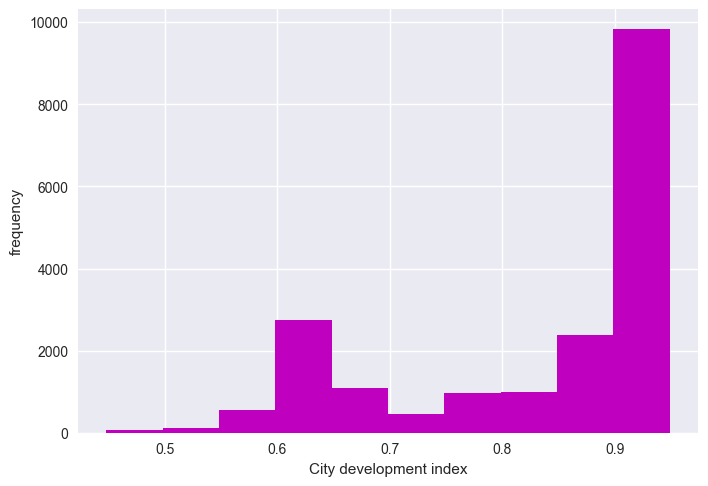

In [65]:
#histogram of city development index in training dataset
plt.hist(train_df['city_development_index'],color='m')
plt.xlabel('City development index')
plt.ylabel('frequency')
plt.show()

In [66]:
gender = train_df['gender'].value_counts()

In [67]:
#pie chart showing gender
fig = go.Figure(data=[go.Pie(labels=gender.index,values=gender.values,hoverinfo='label+percent')])
fig.show()

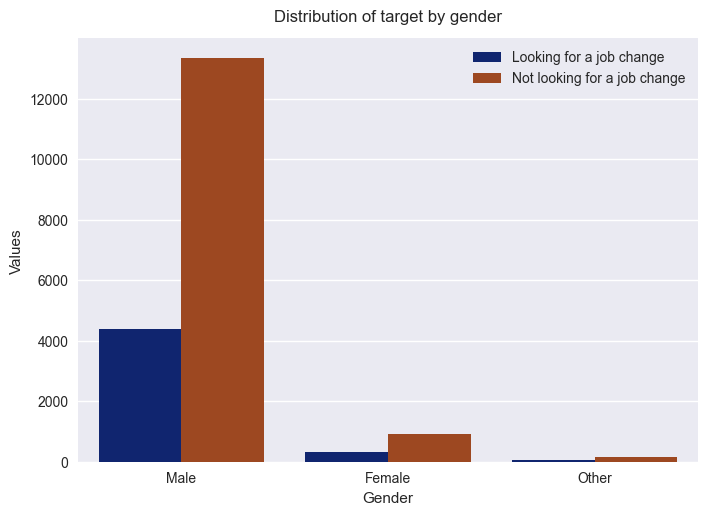

In [68]:
#countplot of gender with respect to target feature
sns.countplot(x=train_df['gender'], hue='target',data=train_df,palette='dark')
plt.title('Distribution of target by gender',y=1.02)
plt.xlabel('Gender')
plt.ylabel('Values')
plt.legend()
plt.show()

In [69]:
experience=train_df['relevent_experience'].value_counts()

In [70]:
#pie chart showing experience level
fig = go.Figure(data=[go.Pie(labels=experience.index,values=experience.values,hoverinfo='label+percent')])
fig.show()

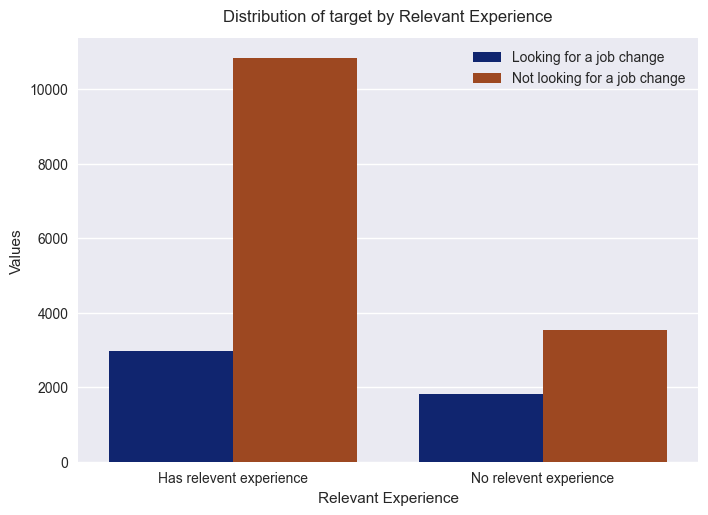

In [71]:
#countplot showing experience level with respect to target feature
sns.countplot(x=train_df['relevent_experience'], hue='target',data=train_df,palette='dark')
plt.title('Distribution of target by Relevant Experience',y=1.02)
plt.xlabel('Relevant Experience')
plt.ylabel('Values')
plt.legend()
plt.show()

In [72]:
edu_level = train_df['education_level'].value_counts()

In [73]:
#pie chart showing education levels
fig = go.Figure(data=[go.Pie(labels=edu_level.index,values=edu_level.values,hoverinfo='label+percent',hole=0.7)])
fig.show()

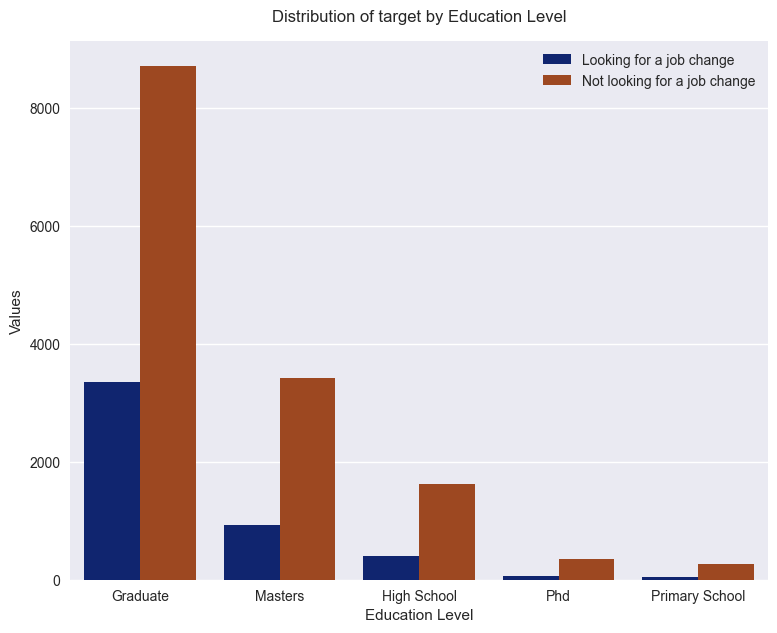

In [74]:
#countplot showing education level with respect to target feature
plt.figure(figsize=(9,7))
sns.countplot(x=train_df['education_level'], hue='target',data=train_df,palette='dark')
plt.title('Distribution of target by Education Level',y=1.02)
plt.xlabel('Education Level')
plt.ylabel('Values')
plt.legend()
plt.show()

In [75]:
major = train_df['major_discipline'].value_counts()

In [76]:
#pie chart showing major discipline
fig = go.Figure(data=[go.Pie(labels=major.index,values=major.values,hoverinfo='label+percent',hole=0.4)])
fig.show()

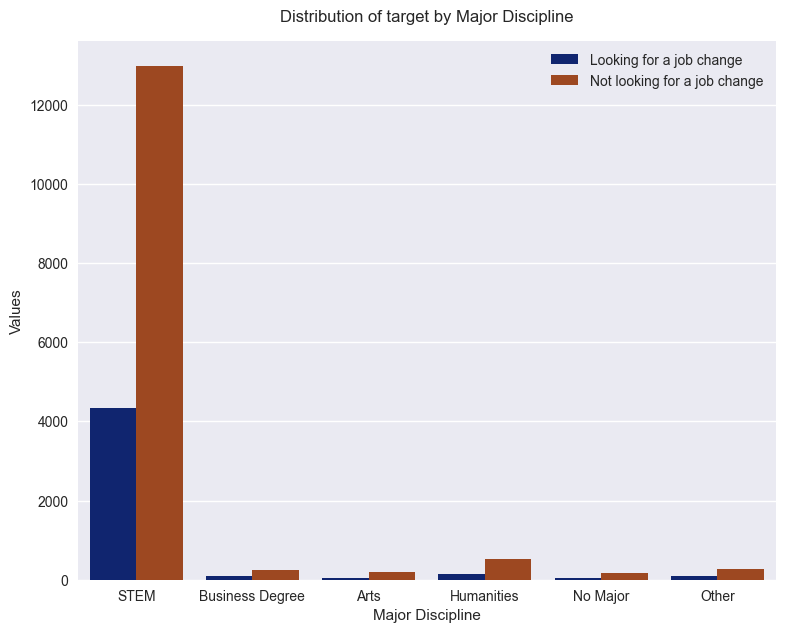

In [77]:
#countplot showing major discipline with respect to target feature
plt.figure(figsize=(9,7))
sns.countplot(x=train_df['major_discipline'], hue='target',data=train_df,palette='dark')
plt.title('Distribution of target by Major Discipline',y=1.02)
plt.xlabel('Major Discipline')
plt.ylabel('Values')
plt.legend()
plt.show()

In [78]:
enrolled = train_df['enrolled_university'].value_counts()

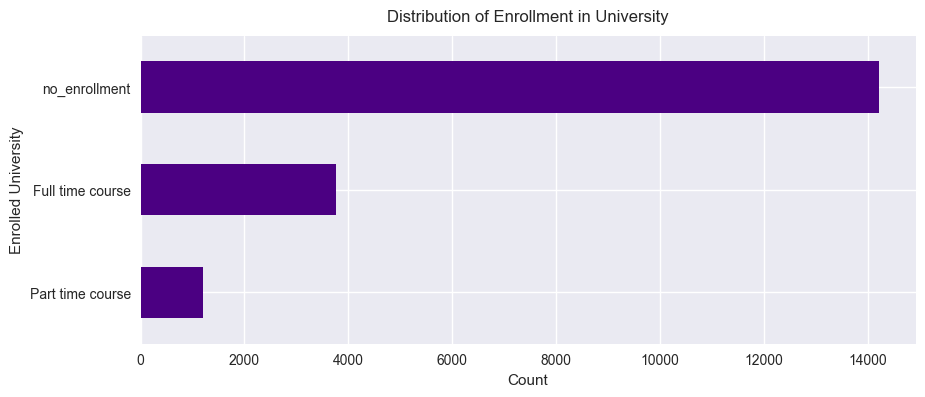

In [79]:
##barplot showing type of enrollment
plt.figure(figsize = (10,4))
plt.style.use('seaborn')
enrolled.sort_values(ascending=True).plot(kind='barh', color ='indigo')
plt.xlabel('Count')
plt.ylabel('Enrolled University')
plt.title('Distribution of Enrollment in University', y= 1.02)
plt.show()

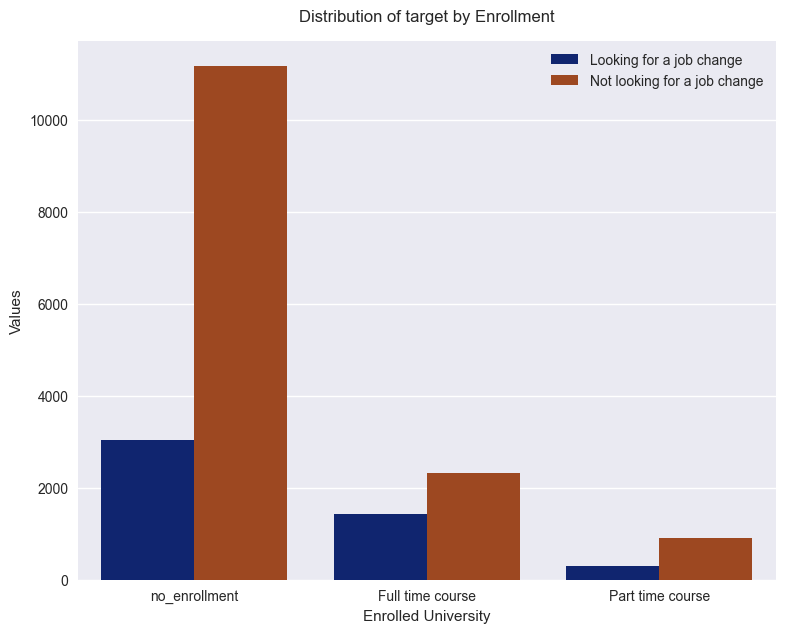

In [80]:
#countplot showing enrollment with respect to target feature
plt.figure(figsize=(9,7))
sns.countplot(x=train_df['enrolled_university'], hue='target',data=train_df,palette='dark')
plt.title('Distribution of target by Enrollment',y=1.02)
plt.xlabel('Enrolled University')
plt.ylabel('Values')
plt.legend()
plt.show()

In [81]:
type = train_df['company_type'].value_counts()

In [82]:
#pie chart showing company type
fig = go.Figure(data=[go.Pie(labels=type.index,values=type.values,hoverinfo='label+percent',hole=0.5)])
fig.show()

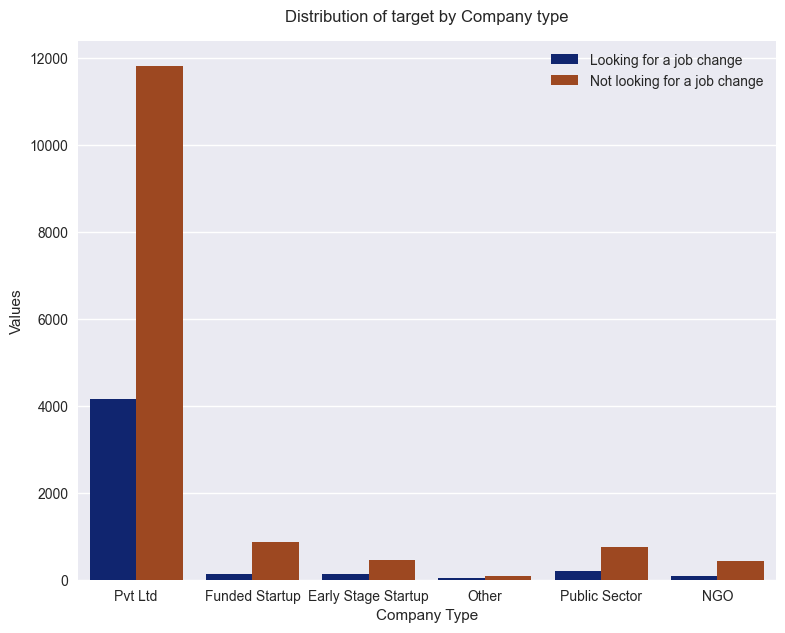

In [83]:
#countplot showing company type with respect to target feature
plt.figure(figsize=(9,7))
sns.countplot(x=train_df['company_type'], hue='target',data=train_df,palette='dark')
plt.title('Distribution of target by Company type',y=1.02)
plt.xlabel('Company Type')
plt.ylabel('Values')
plt.legend()
plt.show()

In [84]:
size = train_df['company_size'].value_counts()

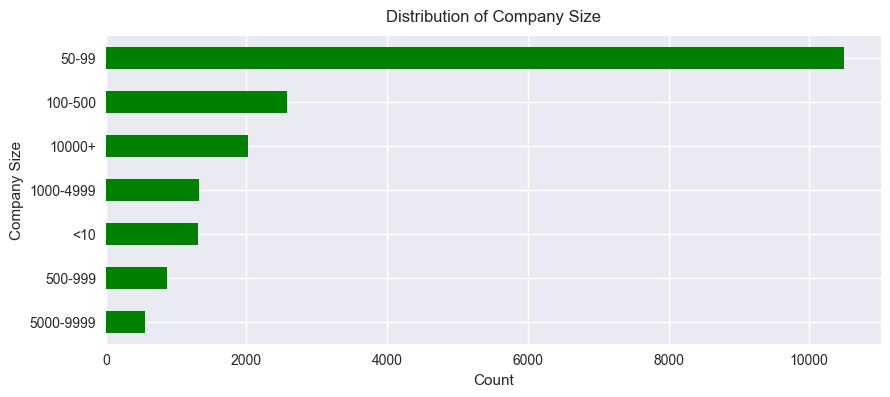

In [85]:
#bar plot showing company size
plt.figure(figsize = (10,4))
plt.style.use('fast')
size.sort_values(ascending=True).plot(kind='barh', color ='green')
plt.xlabel('Count')
plt.ylabel('Company Size')
plt.title('Distribution of Company Size', y= 1.02)
plt.show()

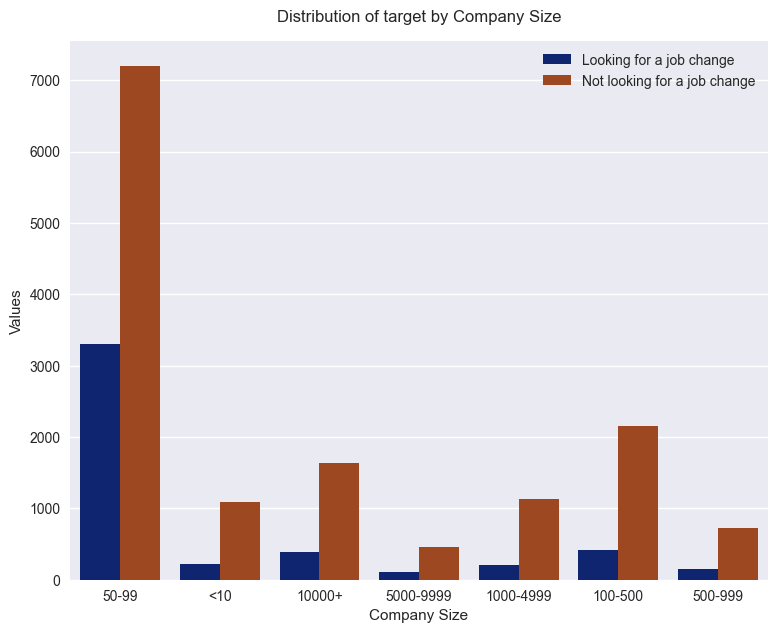

In [86]:
#countplot showing company size with respect to target feature
plt.figure(figsize=(9,7))
sns.countplot(x=train_df['company_size'], hue='target',data=train_df,palette='dark')
plt.title('Distribution of target by Company Size',y=1.02)
plt.xlabel('Company Size')
plt.ylabel('Values')
plt.legend()
plt.show()